In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate
from google.colab import drive

In [ ]:
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
tfms = get_transforms()
path = '/content/drive/My Drive/Datasets/skin/data/'
data = ImageDataBunch.from_folder(path,ds_tfms=tfms, size=100)

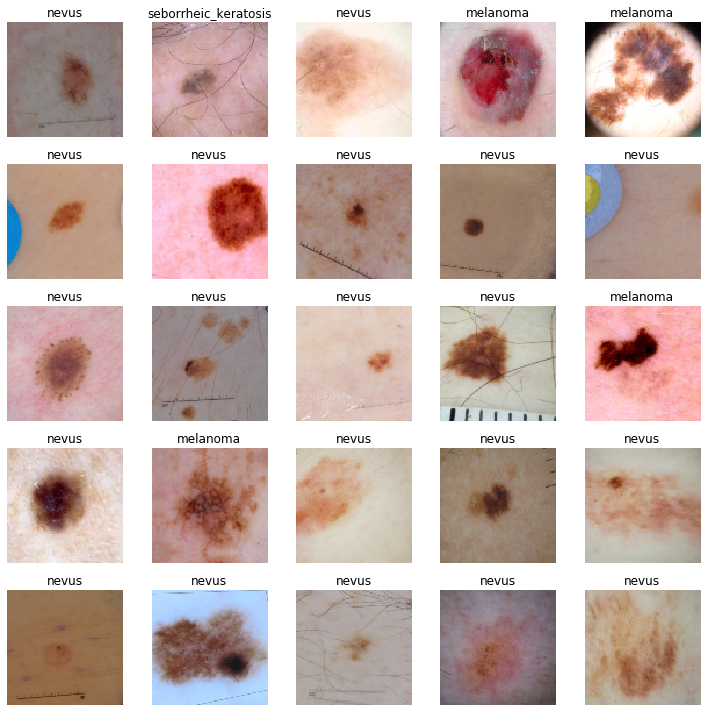

In [ ]:
data.show_batch(rows=5, figsize=(10,10))

In [ ]:
my_trained_mod = cnn_learner(data, models.resnet152, metrics=[accuracy])
defaults.device = torch.device('cuda')
my_trained_mod.fit_one_cycle(20)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/checkpoints/resnet152-b121ed2d.pth
100%|██████████| 230M/230M [00:03<00:00, 62.3MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.685499,0.933979,0.620000,13:03
1,1.536818,0.968431,0.633333,06:36
2,1.346120,0.953957,0.653333,06:39
3,1.144155,0.849421,0.646667,06:42
4,0.989495,0.853263,0.646667,06:32
5,0.847945,0.709569,0.700000,06:36
6,0.751361,0.790290,0.666667,06:37
7,0.677055,0.803767,0.680000,06:43
8,0.630992,0.758463,0.700000,06:43
9,0.574465,0.770703,0.686667,06:41


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


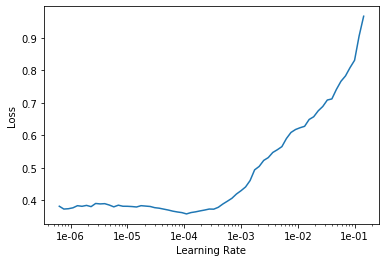

In [ ]:
my_trained_mod.unfreeze() # must be done before calling lr_find
my_trained_mod.lr_find()
my_trained_mod.recorder.plot()

In [ ]:
my_trained_mod.fit_one_cycle(20, max_lr=slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.397691,0.663626,0.720000,06:37
1,0.374352,0.728430,0.720000,06:40
2,0.369286,0.922643,0.713333,06:38
3,0.411468,0.922727,0.680000,06:41
4,0.442933,1.157250,0.646667,06:40
5,0.436314,0.836168,0.666667,06:40
6,0.425554,0.752568,0.720000,06:36
7,0.377196,1.007407,0.746667,06:41
8,0.359961,0.704867,0.733333,06:42
9,0.334694,0.961188,0.693333,06:40


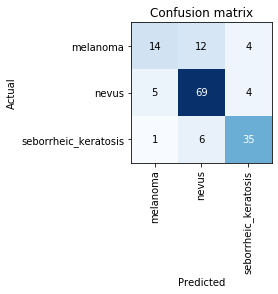

In [ ]:
interp = ClassificationInterpretation.from_learner(my_trained_mod)
interp.plot_confusion_matrix()